In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
def read_csv(path, cols):
    names = ['Size', '#Threads', 'Runtime (s)', 'Energy (J)']
    df = pd.read_csv('data/' + path, names=names, usecols=cols)
    flop = df['Size'] * df['Size'] * (2 * df['Size'] - 1)
    df['GFLOP/s'] = flop / df['Runtime (s)'] / 1e9
    df['MFLOP/J'] = flop / df['Energy (J)'] / 1e6
    return df

df_sac = read_csv('matmul_cn128.csv', [0, 1, 3, 5])
df_sac_pin = read_csv('matmul_cn128_pinned.csv', [0, 1, 3, 5])
df_rust = read_csv('matmul_cn128_rust.csv', [0, 1, 2, 4])
df_rust_pin = read_csv('matmul_cn128_rust_pinned.csv', [0, 1, 2, 4])

df_sac

,Size,#Threads,Runtime (s),Energy (J),GFLOP/s,MFLOP/J
0,300,1,0.031552,0.494251,1.708605,109.074134
1,300,2,0.016572,0.323673,3.252988,166.556950
2,300,3,0.011444,0.266952,4.710585,201.946270
3,300,4,0.009089,0.245895,5.931355,219.239789
4,300,5,0.007472,0.228720,7.215356,235.702565
...,...,...,...,...,...,...
122,1000,11,0.513399,20.974590,3.893655,95.305797
123,1000,12,0.476587,19.786072,4.194411,101.030666
124,1000,13,0.477378,19.895609,4.187458,100.474433
125,1000,14,0.434838,18.441813,4.597117,108.394982


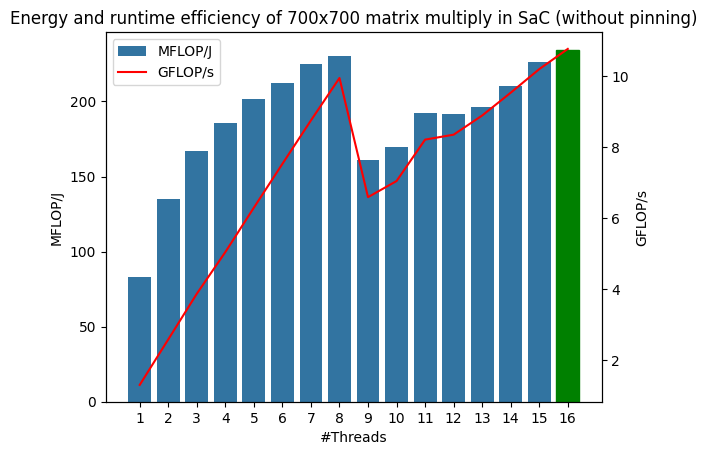

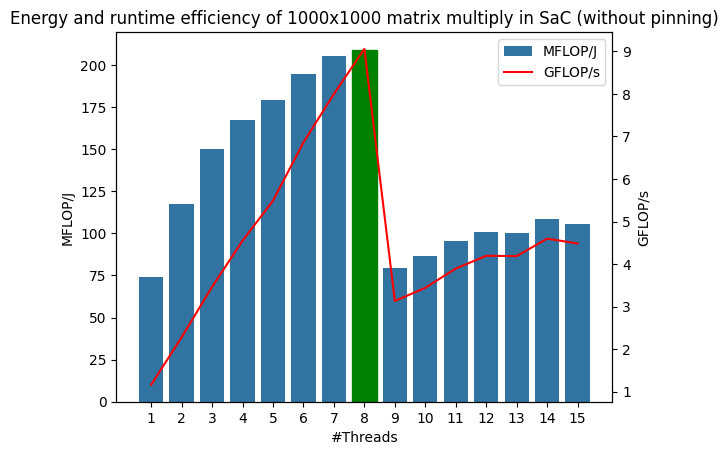

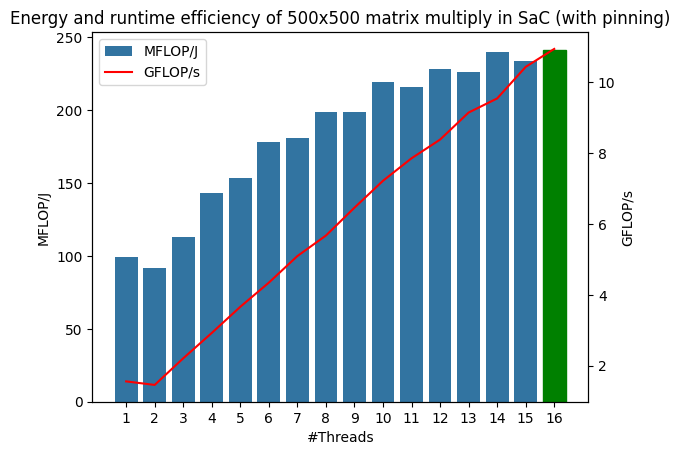

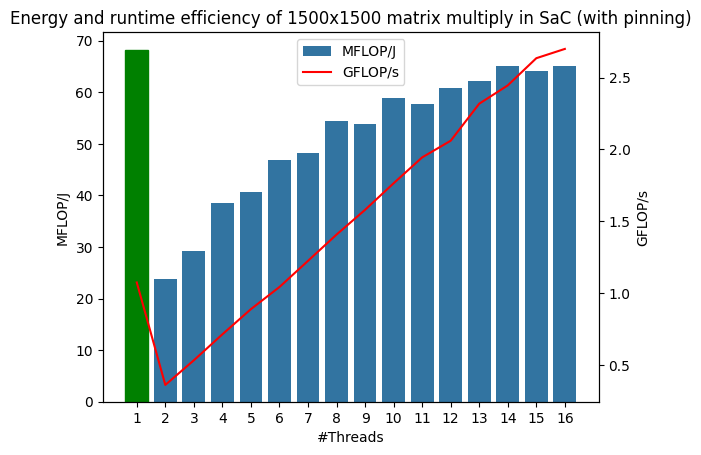

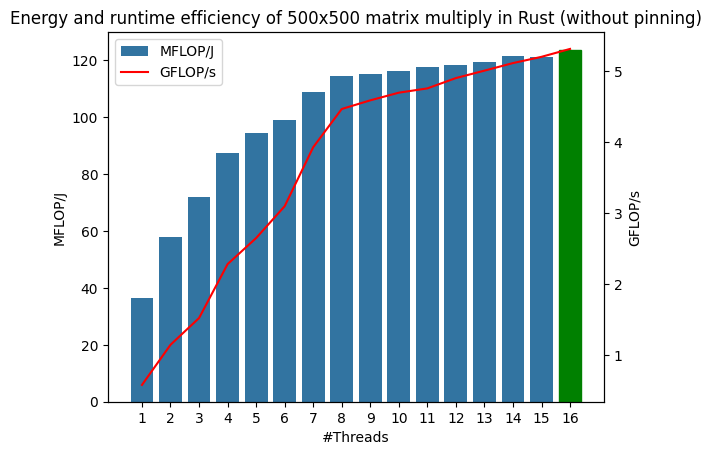

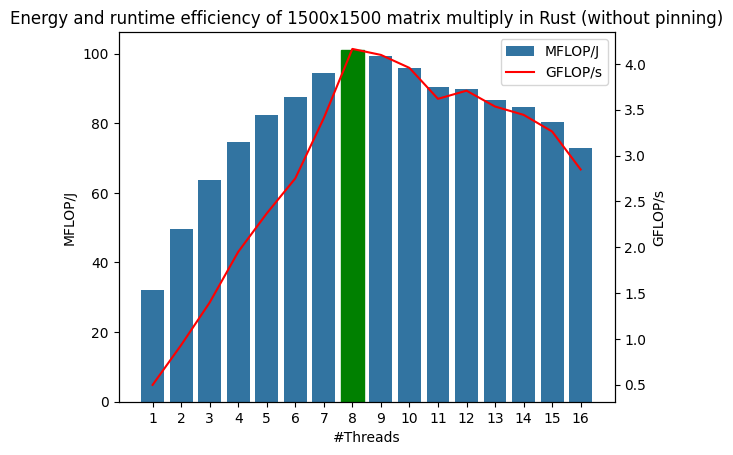

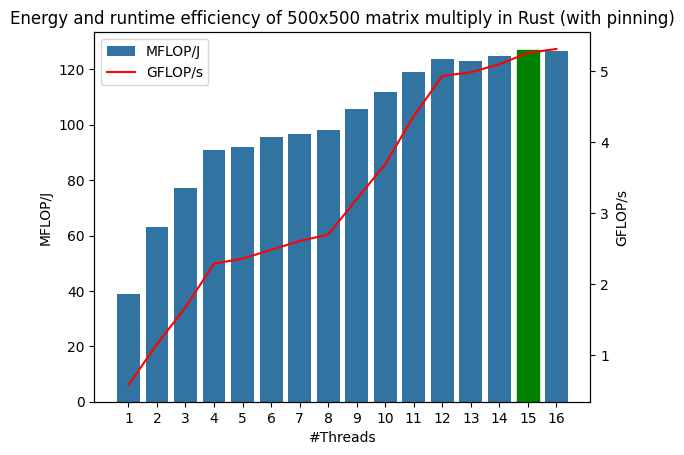

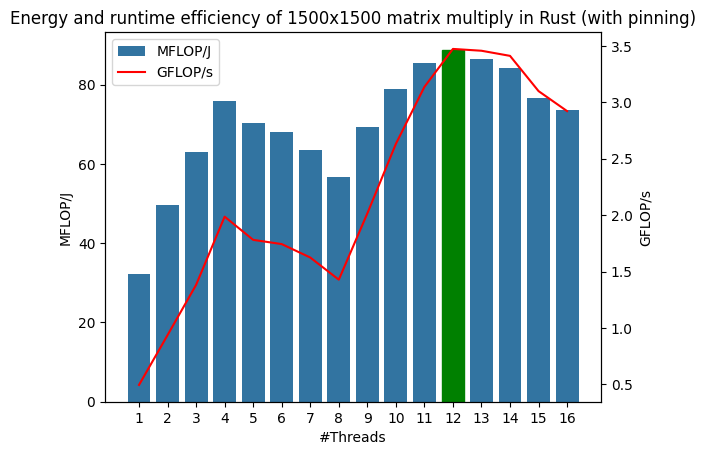

In [72]:
def plot_efficiency(lang, size, df):
    df = df[df['Size'] == size]
    
    ax = sns.barplot(df, x='#Threads', y='MFLOP/J', label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(df, x=df['#Threads']-1, y='GFLOP/s', label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'Energy and runtime efficiency of {size}x{size} matrix multiply in {lang}')

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == df['MFLOP/J'].max():
            bar.set_color('g')
            break

    lang = lang.replace('(', '').replace(')', '').replace(' ', '_')
    plt.savefig(f'images/{lang}_{size}x{size}')
    plt.show()

plot_efficiency('SaC (without pinning)', 700, df_sac)
plot_efficiency('SaC (without pinning)', 1000, df_sac)
plot_efficiency('SaC (with pinning)', 500, df_sac_pin)
plot_efficiency('SaC (with pinning)', 1500, df_sac_pin)
plot_efficiency('Rust (without pinning)', 500, df_rust)
plot_efficiency('Rust (without pinning)', 1500, df_rust)
plot_efficiency('Rust (with pinning)', 500, df_rust_pin)
plot_efficiency('Rust (with pinning)', 1500, df_rust_pin)